In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; 
sns.set()

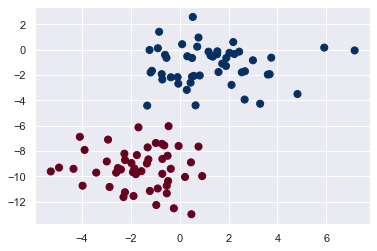

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [3]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [4]:
# 现在生成一些新数据来预测标签：
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) 
ynew = model.predict(Xnew)

(-5.902170524311957, 7.789182875858786, -13.793829460308247, 3.381339464828492)

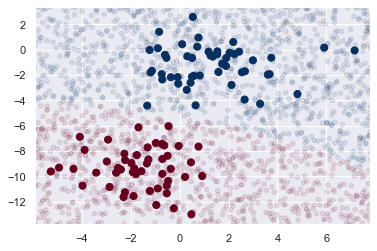

In [5]:
# 可以将这些新数据画出来，看看决策边界的位置
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)

In [6]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups() 
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics'] 
train = fetch_20newsgroups(subset='train', categories=categories) 
test = fetch_20newsgroups(subset='test', categories=categories)

In [8]:
# 选其中一篇新闻看看
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [10]:
model.fit(train.data, train.target) 
labels = model.predict(test.data)

Text(52.893125000000005, 0.5, 'predicted label')

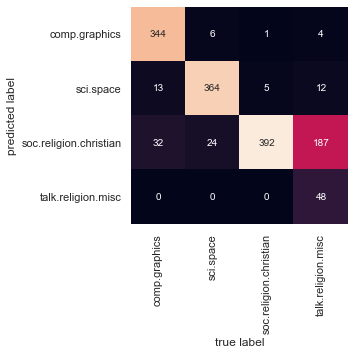

In [11]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(test.target, labels) 
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, 
            yticklabels=train.target_names) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label') 
plt.ylabel('predicted label')

In [12]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s]) 
    return train.target_names[pred[0]]

In [13]:
predict_category('sending a payload to the ISS')

'sci.space'

In [14]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [15]:
predict_category('determining the screen resolution')

'comp.graphics'

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns; 
import numpy as np
sns.set()

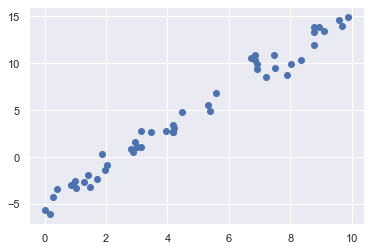

In [17]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50) 
y = 2 * x - 5 + rng.randn(50) 
plt.scatter(x, y)

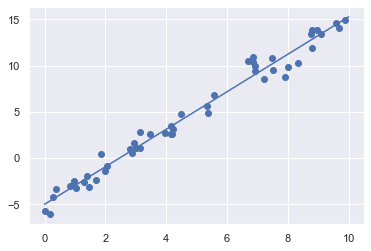

In [18]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000) 
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y) 
plt.plot(xfit, yfit)

In [19]:
# 斜率
print("Model slope: ", model.coef_[0]) 
# 截距
print("Model intercept:", model.intercept_)

Model slope:  2.027208810360695
Model intercept: -4.998577085553202


In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

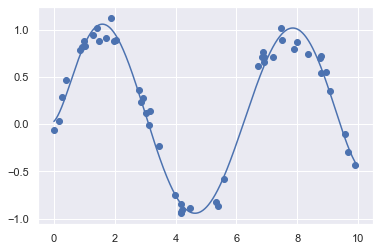

In [21]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50) 
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y) 
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y) 
plt.plot(xfit, yfit)

In [22]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
# 用Seaborn画图 
import seaborn as sns; 
sns.set()

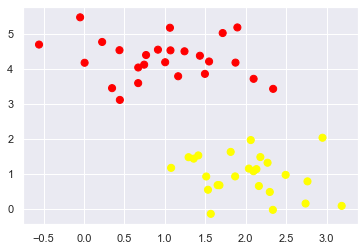

In [23]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

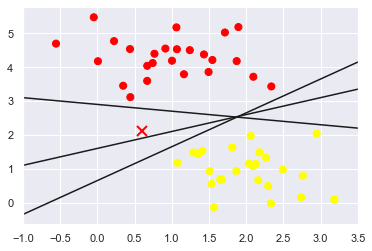

In [24]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k') 
    plt.xlim(-1, 3.5)

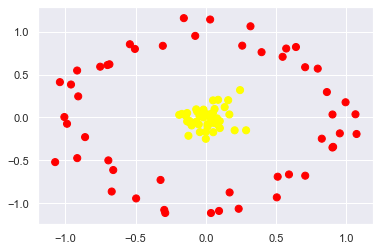

In [25]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets.samples_generator import make_circles 
X, y = make_circles(100, factor=.1, noise=.1) 
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [26]:
r = np.exp(-(X ** 2).sum(1))

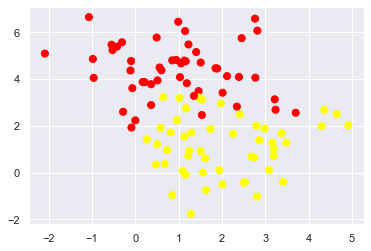

In [27]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

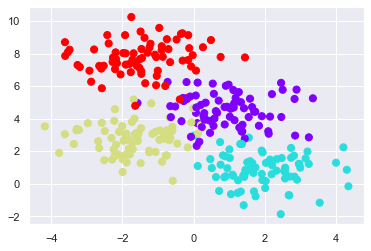

In [31]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, 
                  random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

<ErrorbarContainer object of 3 artists>

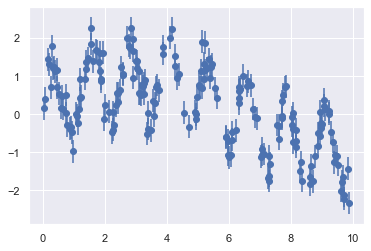

In [32]:
rng = np.random.RandomState(42) 
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x) 
    slow_oscillation = np.sin(0.5 * x) 
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation + noise

y = model(x) 
plt.errorbar(x, y, 0.3, fmt='o')

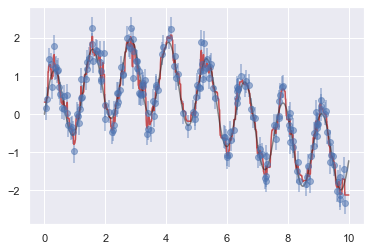

In [33]:
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor(200) 
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000) 
yfit = forest.predict(xfit[:, None]) 
ytrue = model(xfit, sigma=0)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

In [34]:
from sklearn.datasets import load_digits 
digits = load_digits() 
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

Text(0, 7, '3')

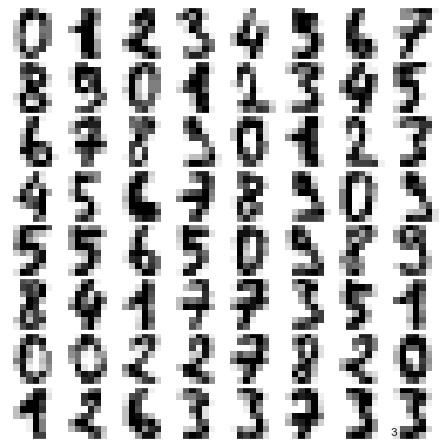

In [35]:
# 设置图形对象 
fig = plt.figure(figsize=(6, 6))
# 以英寸为单位
fig.subplots_adjust(left=0, right=1, bottom=0, 
                    top=1, hspace=0.05, wspace=0.05)
# 画数字：每个数字是8像素×8像素 
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
# 用target值给图像作标注 
ax.text(0, 7, str(digits.target[i]))

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0) 
model = RandomForestClassifier(n_estimators=1000) 
model.fit(Xtrain, ytrain) 
ypred = model.predict(Xtest)

In [37]:
from sklearn import metrics 
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.95      0.97        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(77.10000000000001, 0.5, 'predicted label')

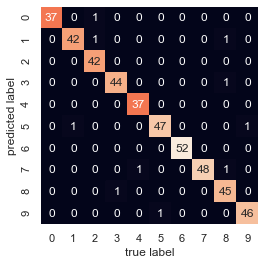

In [76]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred) 
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('true label') 
plt.ylabel('predicted label')

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593763,
 1.0195904306706842)

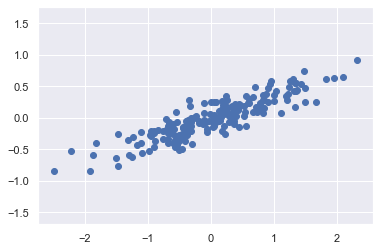

In [39]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T 
plt.scatter(X[:, 0], X[:, 1]) 
plt.axis('equal')

In [40]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [41]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [42]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [43]:
pca = PCA(n_components=1)
pca.fit(X) 
X_pca = pca.transform(X) 
print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


(-2.77152878069022, 2.661757596590677, -0.9964674432667129, 1.0219081775900811)

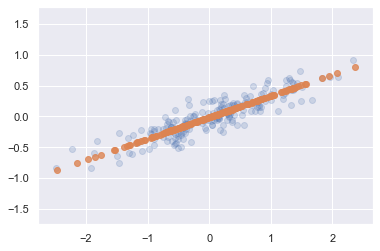

In [44]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

Text(0, 0.5, 'cumulative explained variance')

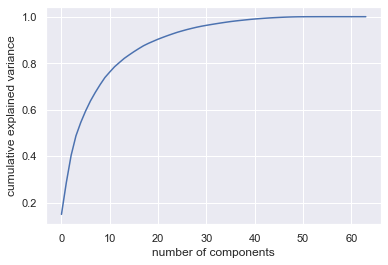

In [45]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance')

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set() 
import numpy as np

In [47]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

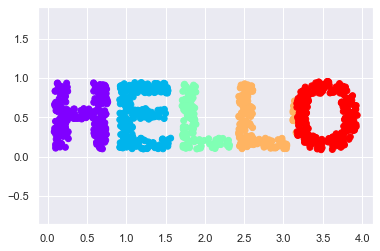

In [48]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

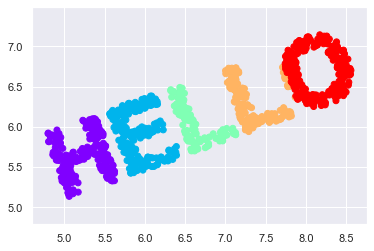

In [49]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

In [50]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

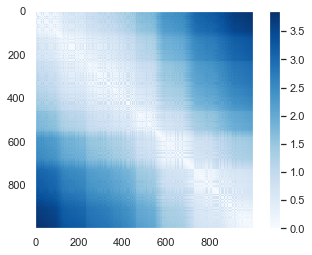

In [51]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [52]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

(-1.039006410772759, 1.0377133989963179, -2.064666005451131, 2.135458244484913)

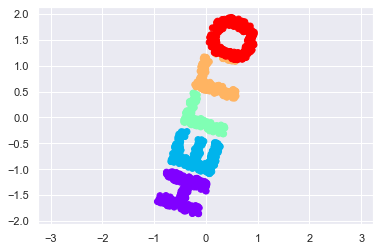

In [53]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal')

In [54]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

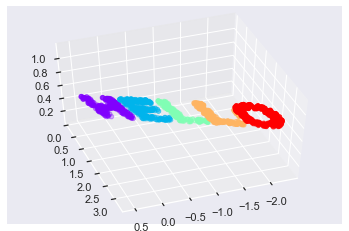

In [55]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

(-1.0390064107727603,
 1.03771339899632,
 -2.0646660054511305,
 2.1354582444849126)

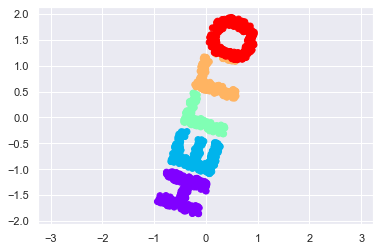

In [56]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

In [57]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

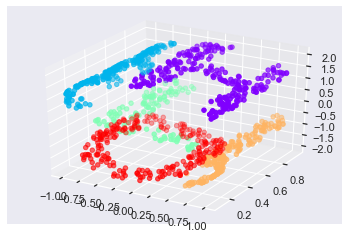

In [58]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize)

(-1.3904556323554298,
 1.2493637628504923,
 -2.3855494181659127,
 2.1899859123555574)

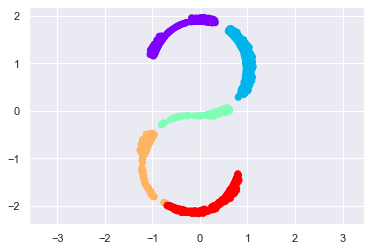

In [59]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal')

(0.15, -0.15)

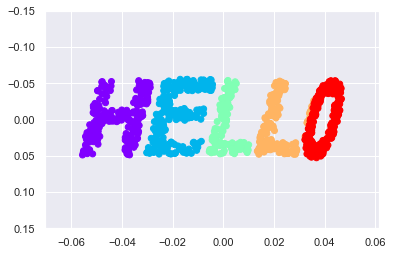

In [60]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15)

In [61]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

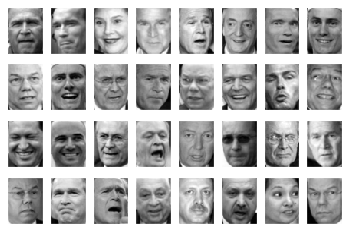

In [62]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

Text(0, 0.5, 'cumulative variance')

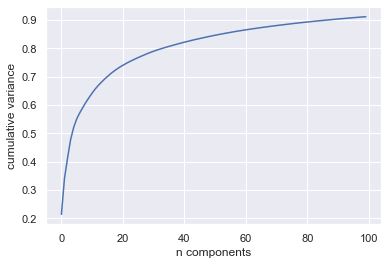

In [63]:
from sklearn.decomposition import PCA
model = PCA(n_components=100,svd_solver='randomized').fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')

In [64]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [65]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

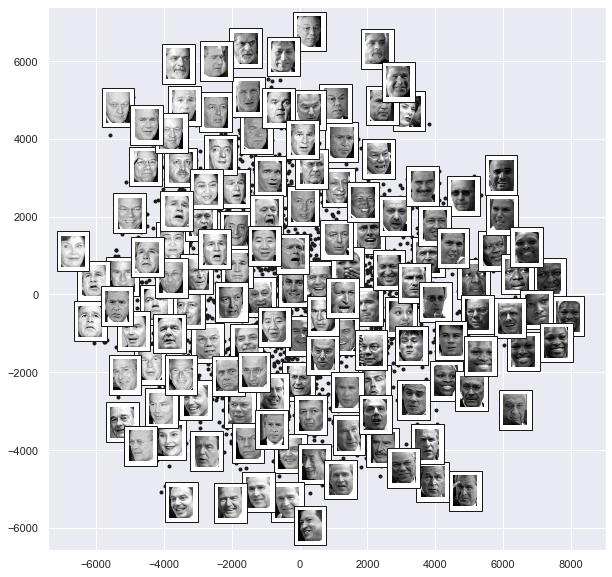

In [66]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

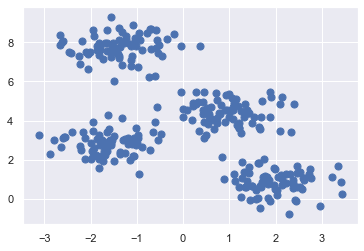

In [67]:
from sklearn.datasets.samples_generator import make_blobs 
X, y_true = make_blobs(n_samples=300, centers=4, 
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [68]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

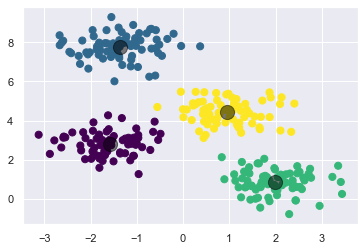

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, 
            s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, alpha=0.5)

In [70]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed) 
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x
x = make_data(1000)

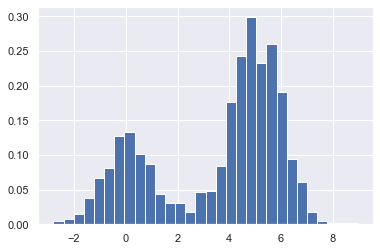

In [74]:
hist = plt.hist(x, bins=30,  density=True)